Multi linear regression


In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [196]:
startup_data = pd.read_csv(r"C:\Users\91863\Downloads\50_Startups.csv")
startup_data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [197]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [198]:
startup_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [257]:
startup_data = startup_data.rename({"R&D Spend" :"RDS", "Administration":"ADM","Marketing Spend": "MKS"},axis=1)
startup_data.head()




,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [258]:
startup_data.shape

(50, 5)

In [209]:
startup_data.isnull().sum()

RDS       0
ADM       0
MKS       0
State     0
Profit    0
dtype: int64

In [259]:
startup_data.corr(numeric_only=True)    #correlation matrix

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x23bede855d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23bede85b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x23bede85330>],
 'medians': [<matplotlib.lines.Line2D at 0x23bede86080>],
 'fliers': [<matplotlib.lines.Line2D at 0x23bede86320>],
 'means': []}

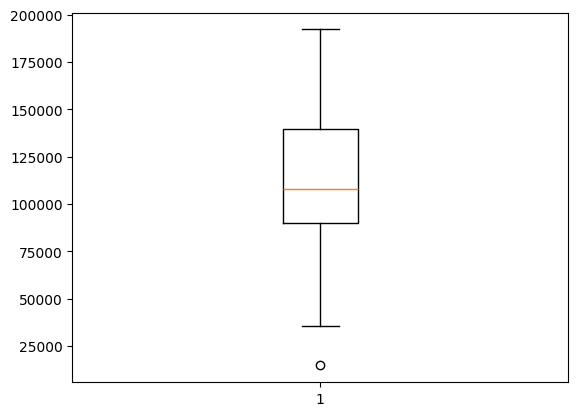

In [211]:
plt.boxplot(startup_data["Profit"])

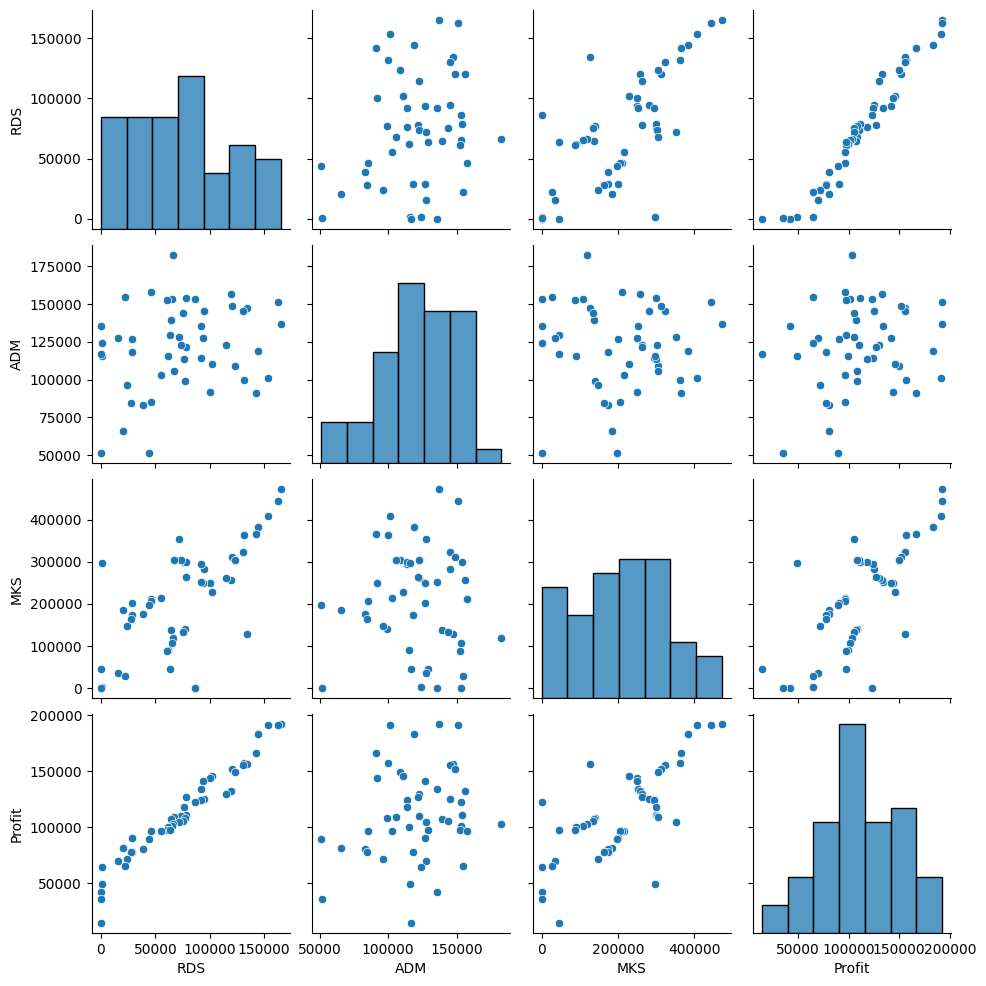

In [212]:
sns.pairplot(startup_data)

BUILDING MODEL

In [213]:
#preparing a model using ORDINARY LEAST SQUARE (OLS) METHODOLOGY
model=smf.ols("Profit~RDS+ADM+MKS",data=startup_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        17:16:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
#accuracy of the model = 0.951  --  95.1%
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [215]:
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKS              0.027228
dtype: float64

In [217]:
model.tvalues,model.pvalues

(Intercept     7.626218
 RDS          17.846374
 ADM          -0.525507
 MKS           1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RDS          2.634968e-22
 ADM          6.017551e-01
 MKS          1.047168e-01
 dtype: float64)

since the p-value of ADM and MKS are greater than 0.05, building simple and multi linear regression

## simple linear regresson

In [222]:
ml_adm = smf.ols("Profit~ ADM",data=startup_data).fit()
ml_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 09 Dec 2023   Prob (F-statistic):              0.162
Time:                        17:22:06   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-value is greater than 0.05 so , no significant p- value

In [223]:
ml_mks = smf.ols("Profit~ MKS",data=startup_data).fit()
ml_mks.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           4.38e-10
Time:                        17:29:08   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MKS            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MULTI LINEAR REGRESSION

In [226]:
ml_ma = smf.ols("Profit~MKS+ADM",data=startup_data).fit()
ml_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.50e-10
Time:                        17:40:34   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
MKS            0.2488      0.030      8.281      0.000       0.188       0.309
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

while built together , both columns have significant p- value

# MODEL VALIDATION TECHNIQUES
* VIF CHECKING
* RESIDUAL ANALYSIS

In [225]:
# VARIANCE IMPRESSION FACTOR
rsq_mks = smf.ols("MKS~RDS+ADM",data=startup_data).fit().rsquared
vif_mks = 1/(1-rsq_mks)   

rsq_rds = smf.ols("RDS~MKS+ADM",data=startup_data).fit().rsquared
vif_rds = 1/(1-rsq_rds) 

rsq_adm= smf.ols("ADM~RDS+MKS",data=startup_data).fit().rsquared
vif_adm = 1/(1-rsq_adm)  

#STORING VIF VALUES IN A DATA FRAME
vif_frame=pd.DataFrame({"variables":["RDS","ADM","MKS"],"VIF":[vif_rds,vif_adm,vif_mks]})

vif_frame

,variables,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MKS,2.326773


In [228]:
# Since no column has more than 20  vif, we can include all columns fo building the model

RESIDUAL ANALYSIS - q-q plot

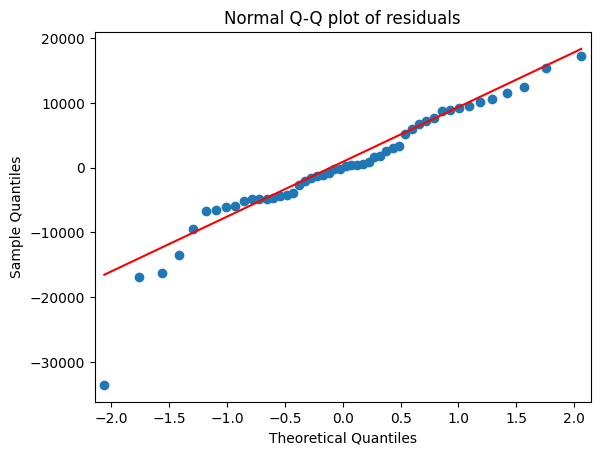

In [229]:
import statsmodels.api as sm

qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [232]:
list(np.where(model.resid<-20000)) 

[array([49], dtype=int64)]

In [233]:
# residual plot for homoscedasticity -  errors VS fitted value
def get_standardized_value(vals): 
    return (vals - vals.mean())/vals.std()       #returns z values

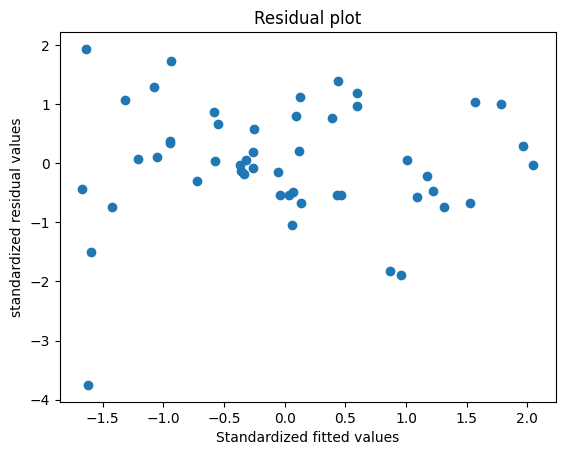

In [234]:
plt.scatter(get_standardized_value(model.fittedvalues),  ##--> model_y_hat
            get_standardized_value(model.resid))

plt.title("Residual plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

eval_env: 1


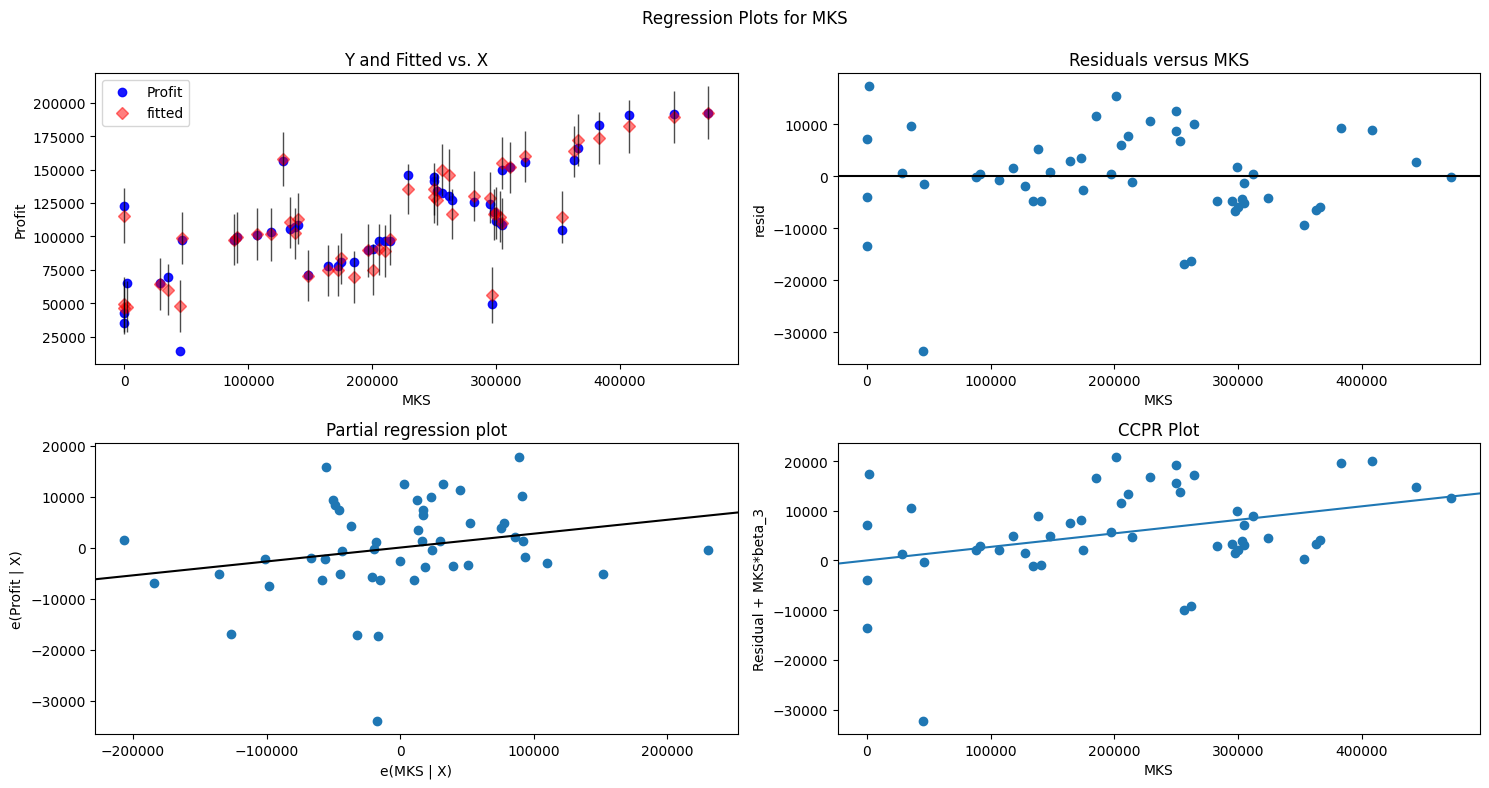

In [236]:
#Residuals VS regressors
#(Ei        Vs     Xi)
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"MKS",fig=fig)
plt.show()

eval_env: 1


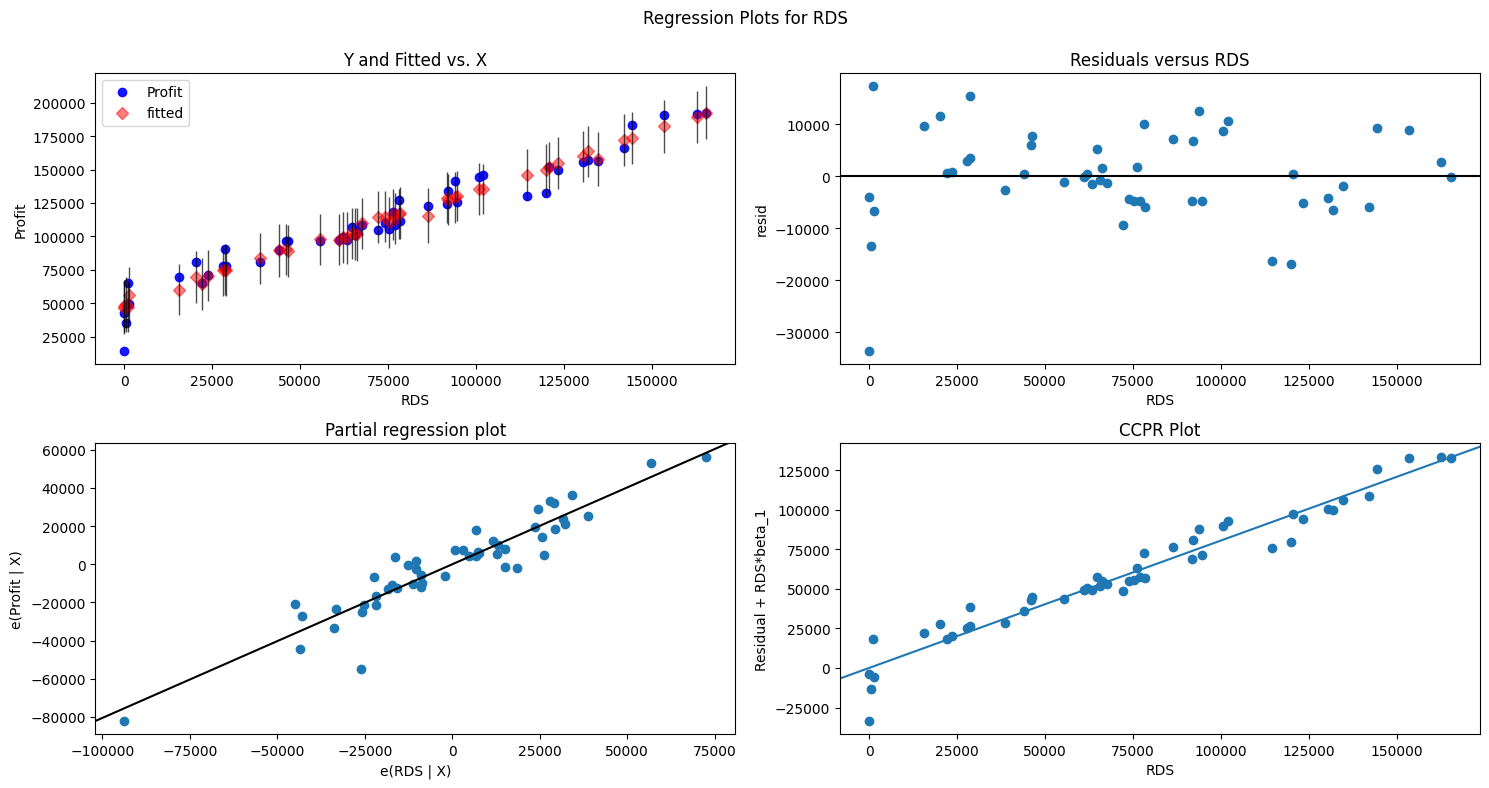

In [238]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()

eval_env: 1


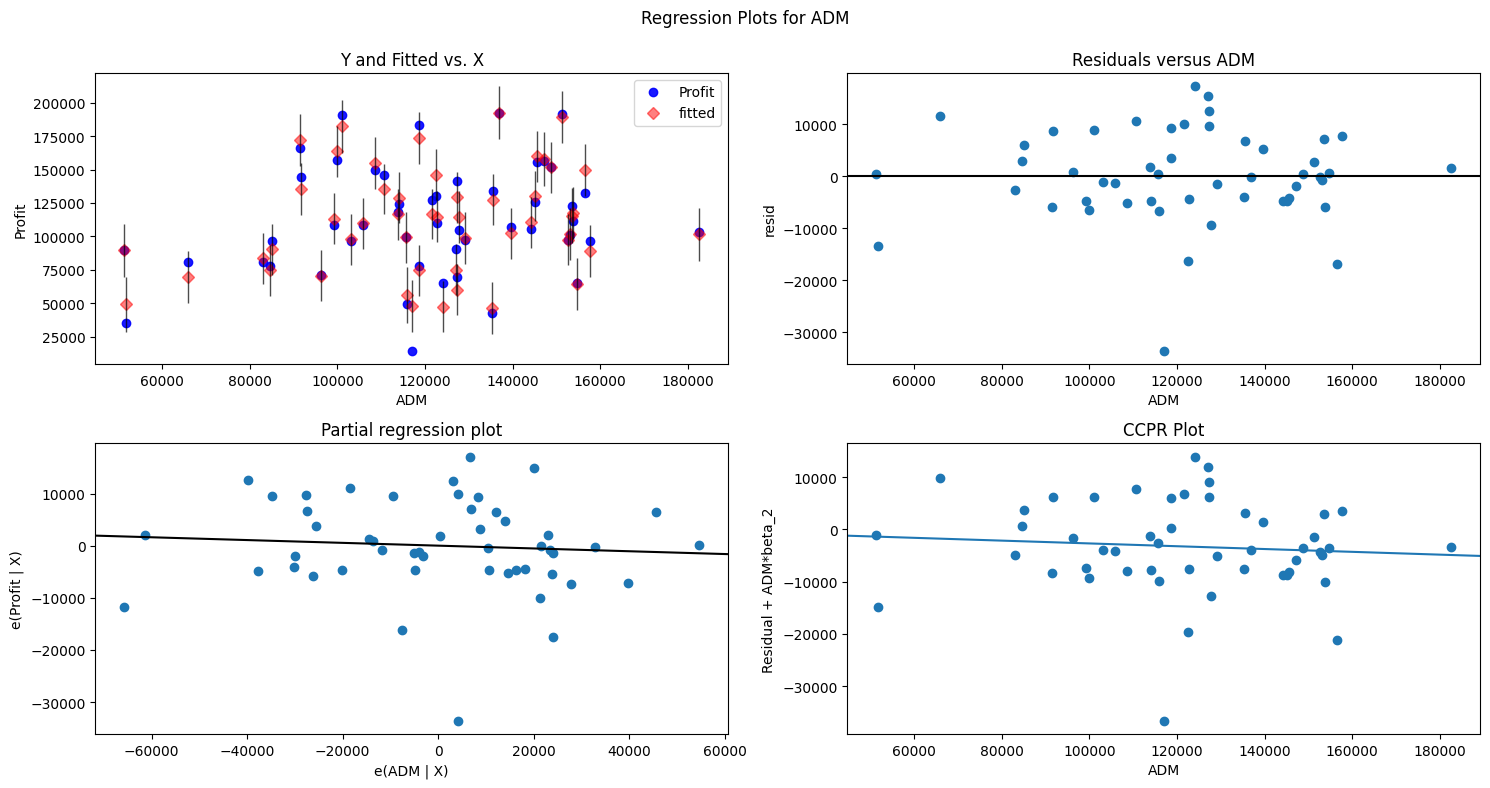

In [239]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"ADM",fig=fig)
plt.show()

since there is no pattern found , we can proceed further

# model deletion diagnostics
detecting influencers/outliers

In [240]:
#COOK'S DISTANCE

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

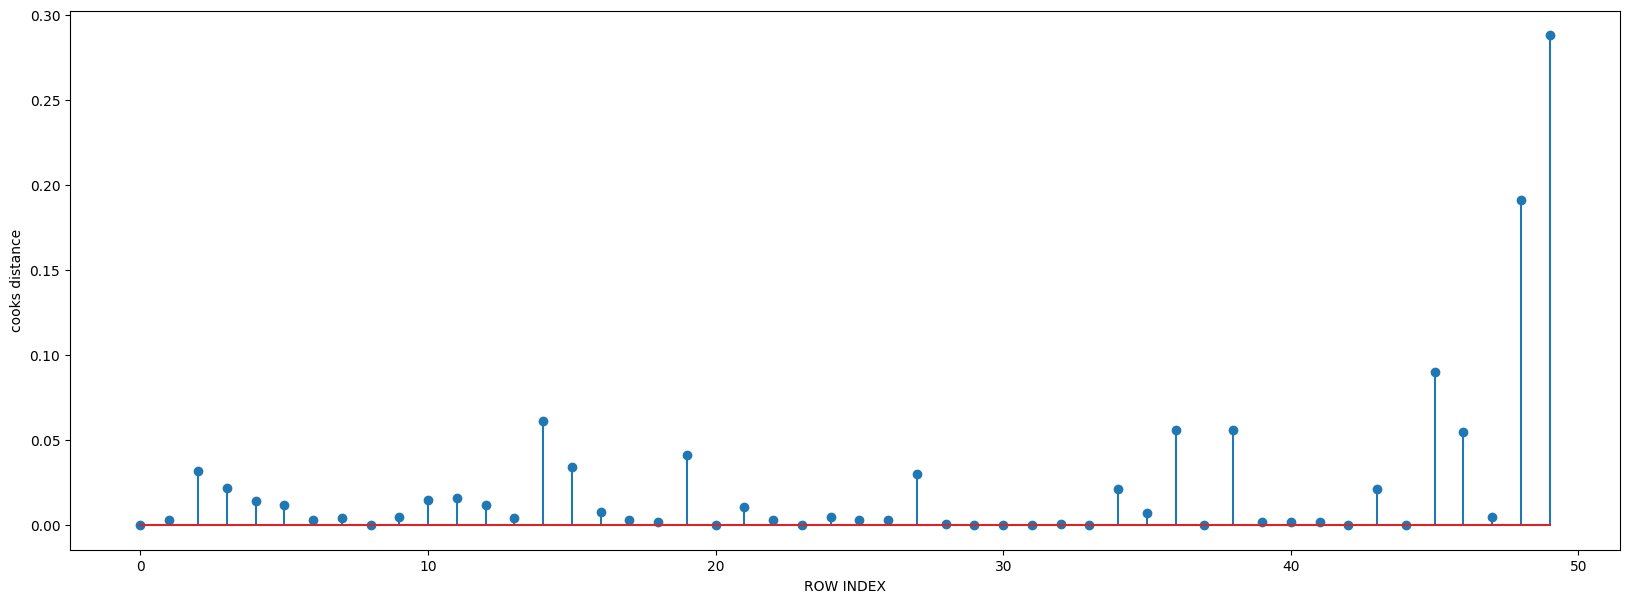

In [241]:
# plot the influencers values using stem plot
fig= plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(startup_data)),np.round(c,3))
plt.xlabel("ROW INDEX")
plt.ylabel("cooks distance")
plt.show()


In [242]:
#index and  values of influencer  are those where c is more than .5 
(np.argmax(c),np.max(c))    # index, distance of c   

(49, 0.2880822927543263)

there is no datapoint is more  than 0.5

high influence points/leverage

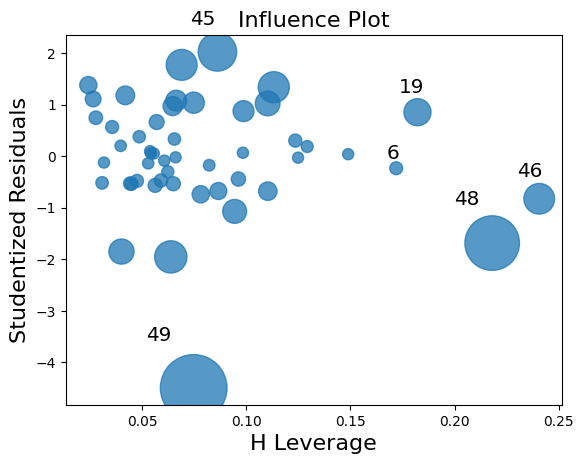

In [243]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [245]:
k= startup_data.shape[1]
n= startup_data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

In [246]:
startup_data[startup_data.index.isin([49])]

,RDS,ADM,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [247]:
startup_data.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# improving the model
discarding the datapoints which are influencers

In [260]:
## load the data
startup_new= startup_data.copy()
startup_new=startup_new.drop(startup_new.index[[49]],axis=0).reset_index(drop= True)


In [261]:
#discard the data points which are influencers and reassign the row number (reset_index())
startup_new.head()

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


build model

In [264]:
final_model= smf.ols("Profit~RDS+MKS+ADM",data=startup_new).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        18:04:57   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
MKS            0.0252      0.014      1.825      0.075      -0.003       0.053
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [266]:
final_model.rsquared,final_model.aic

(0.9613162435129847, 1020.5652974526367)

accuracy improved to 96.1%

# prediction


In [267]:
# new data for prediction
new_data = pd.DataFrame({"RDS":146843.98,"MKS":408765.65,"ADM":197654.76},index=[1])

In [273]:
final_model.predict(new_data)   #manual predict

1    173287.983703
dtype: float64

In [270]:
pred_y = final_model.predict(startup_new)

In [272]:
startup_new["y_hat"]=pred_y
startup_new.head()

,RDS,ADM,MKS,State,Profit,y_hat
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721


In [276]:
#table containing R values

df2 = pd.DataFrame({"Predicted Models": ["model","final_model"],"Rsquared_val":[model.rsquared,final_model.rsquared]})
df2

,Predicted Models,Rsquared_val
0,model,0.950746
1,final_model,0.961316


----

-----

2)  Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [295]:
corolla=pd.read_csv(r"C:\Users\91863\Downloads\ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [296]:
corolla.columns  #("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [302]:
corolla = corolla[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [303]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [304]:
corolla.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [306]:
corolla.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [308]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


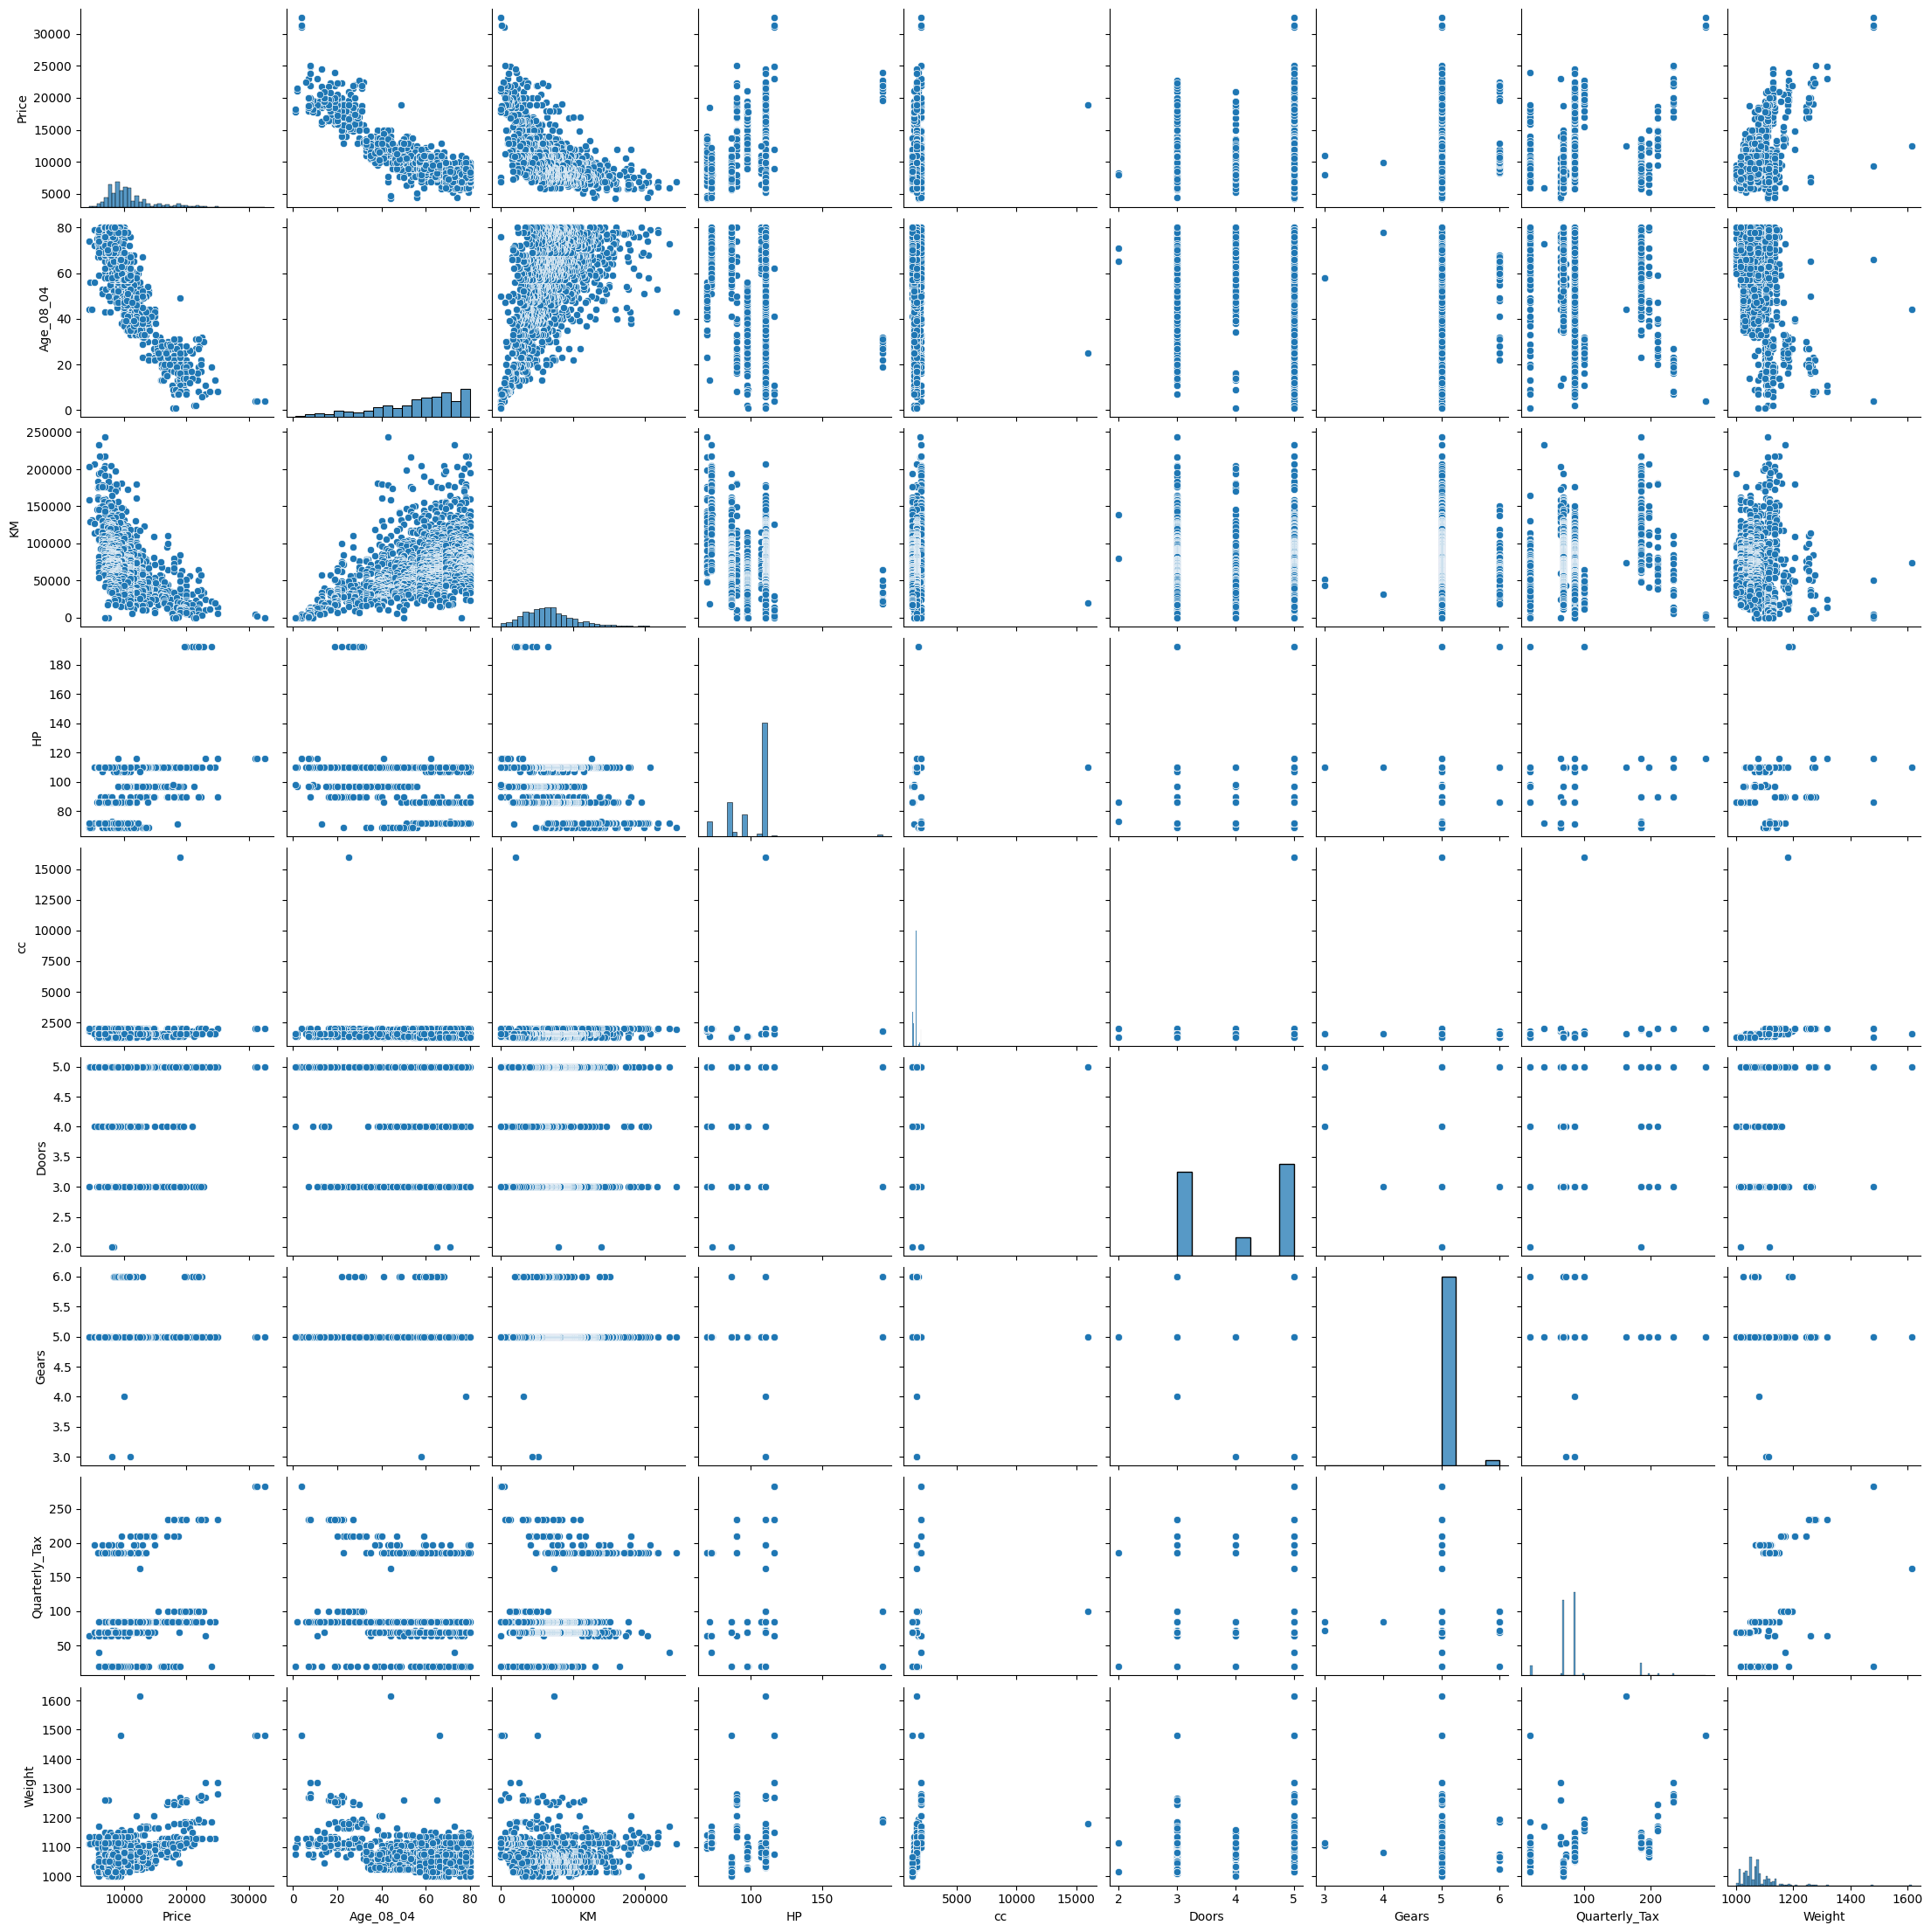

In [307]:
sns.pairplot(corolla)

build model



In [310]:
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=corolla).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:12:21   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-values of cc and Doors are beyond 0.05

In [311]:
# coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [312]:
model.tvalues,model.pvalues

(Intercept        -3.948666
 Age_08_04       -46.511852
 KM              -16.621622
 HP               11.241018
 cc               -1.344222
 Doors            -0.040410
 Gears             3.016007
 Quarterly_Tax     3.014535
 Weight           15.879803
 dtype: float64,
 Intercept         8.241949e-05
 Age_08_04        3.354724e-288
 KM                7.538439e-57
 HP                3.757218e-28
 cc                1.790902e-01
 Doors             9.677716e-01
 Gears             2.606549e-03
 Quarterly_Tax     2.619148e-03
 Weight            2.048576e-52
 dtype: float64)

In [313]:
model.rsquared,model.rsquared_adj

(0.8637627463428191, 0.8629989775766962)

SIMPLE_LINEAR REGRESSION

In [314]:
ml_cc = smf.ols("Price~cc",data=corolla).fit()
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.55e-06
Time:                        11:17:02   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [315]:
ml_doors= smf.ols("Price~Doors",data=corolla).fit()
ml_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.46e-12
Time:                        11:17:39   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

both  cc and doors have significant value individually

# multilinear regresson for cc and doors

In [318]:
ml_cd= smf.ols("Price~cc+Doors",data=corolla).fit()
ml_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.15e-15
Time:                        11:19:12   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p-values are less than 0.05 

MODEL VALIDATION TECHNIQUES
* calculating VIF
* residual analysis

In [321]:
##VIF
rsq_age= smf.ols("Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=corolla).fit().rsquared
vif_age = 1/(1-rsq_age  )

rsq_km= smf.ols("KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=corolla).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp= smf.ols("HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data=corolla).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc= smf.ols("cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=corolla).fit().rsquared
vif_cc = 1/(1-rsq_cc) 

rsq_doors= smf.ols("Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=corolla).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_g= smf.ols("Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=corolla).fit().rsquared
vif_g = 1/(1-rsq_g)

rsq_qt= smf.ols("Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data=corolla).fit().rsquared
vif_qt = 1/(1-rsq_qt) 

rsq_wt= smf.ols("Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=corolla).fit().rsquared
vif_wt = 1/(1-rsq_wt )


#STORING VIF VALUES IN A DATA FRAME
d1={"variables":["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],"VIF":[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_g,vif_qt,vif_wt]}
vif_frame = pd.DataFrame(d1)
vif_frame

,variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


since, no column is more than 20, no multi collinearity

Residual analysis

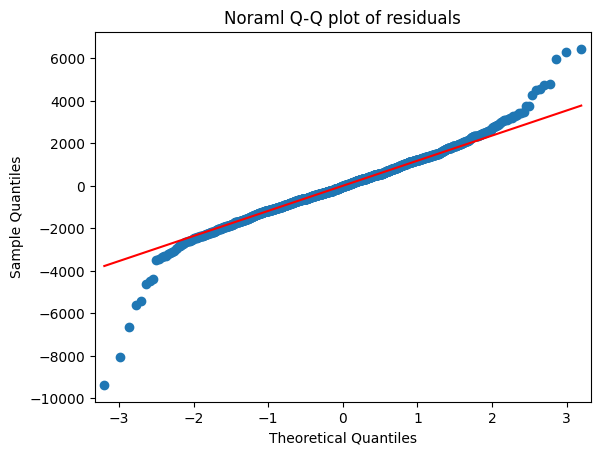

In [322]:
# Q-Q plots

import statsmodels.api as sm
qqplot =sm.qqplot(model.resid,line = "q") # line-q = 45 to draw the diagonal line
plt.title("Noraml Q-Q plot of residuals")
plt.show()

In [333]:
list(np.where(model.resid> 4000) )
     

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

In [334]:
list(np.where(model.resid <-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960], dtype=int64)]

In [335]:
# residual plot for homoscedasticity -  errors VS fitted value
def get_standardized_value(vals):
    return (vals - vals.mean())/vals.std()          # return z values 

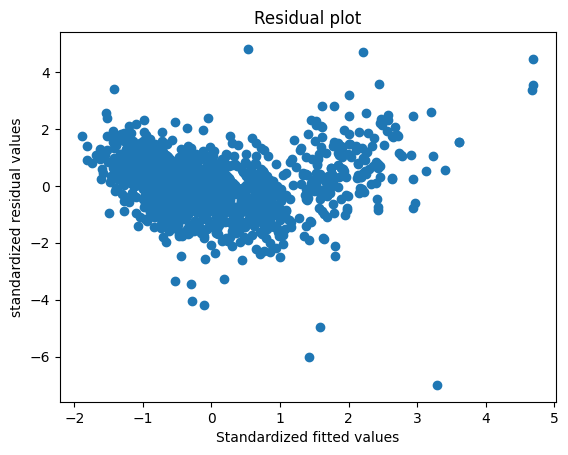

In [336]:
plt.scatter(get_standardized_value(model.fittedvalues),  ##--> model_y_hat
            get_standardized_value(model.resid))

plt.title("Residual plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("standardized residual values")
plt.show()

REsiduals VS regressors
Ei        Vs     Xi

eval_env: 1


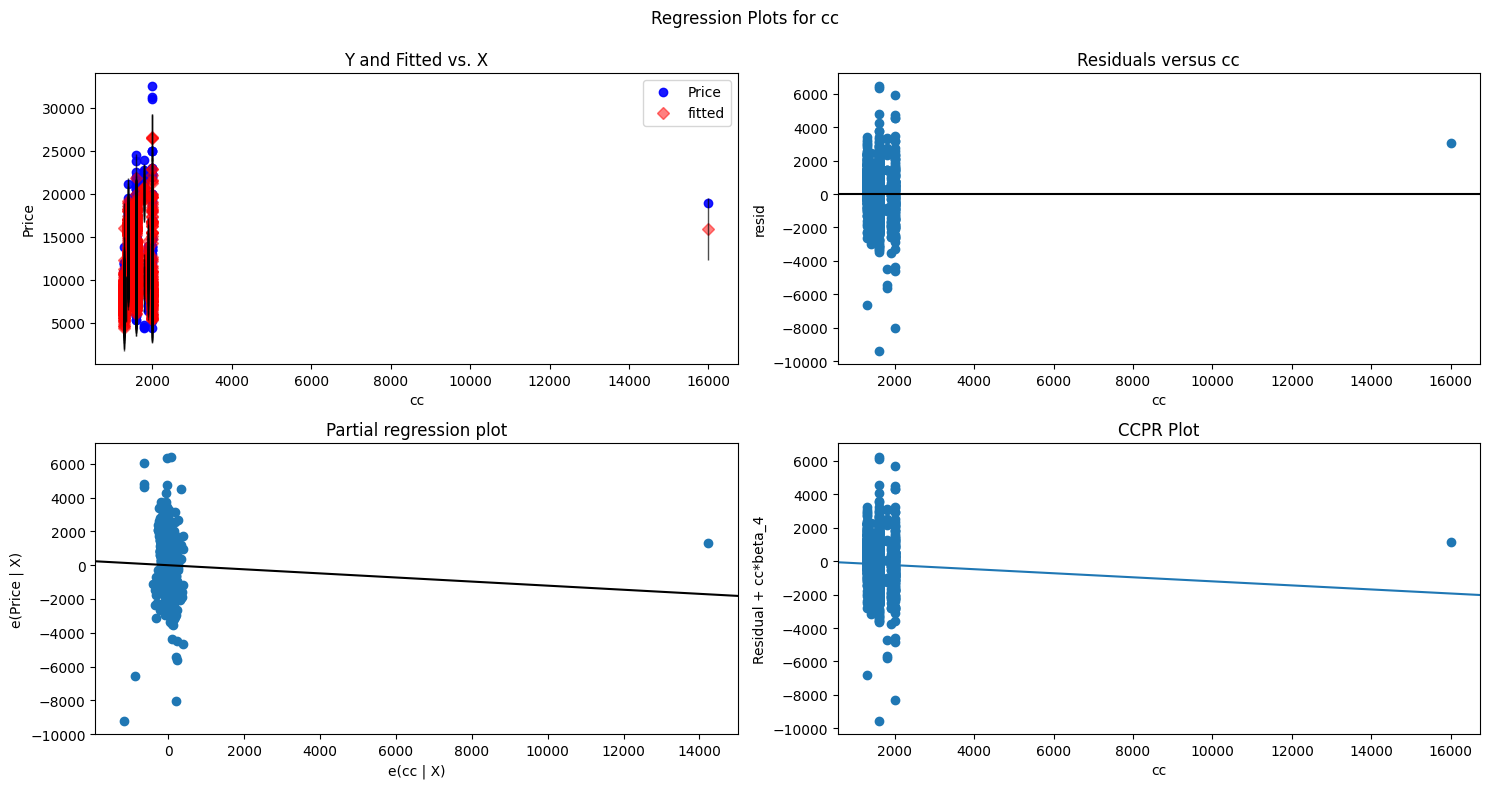

In [337]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

eval_env: 1


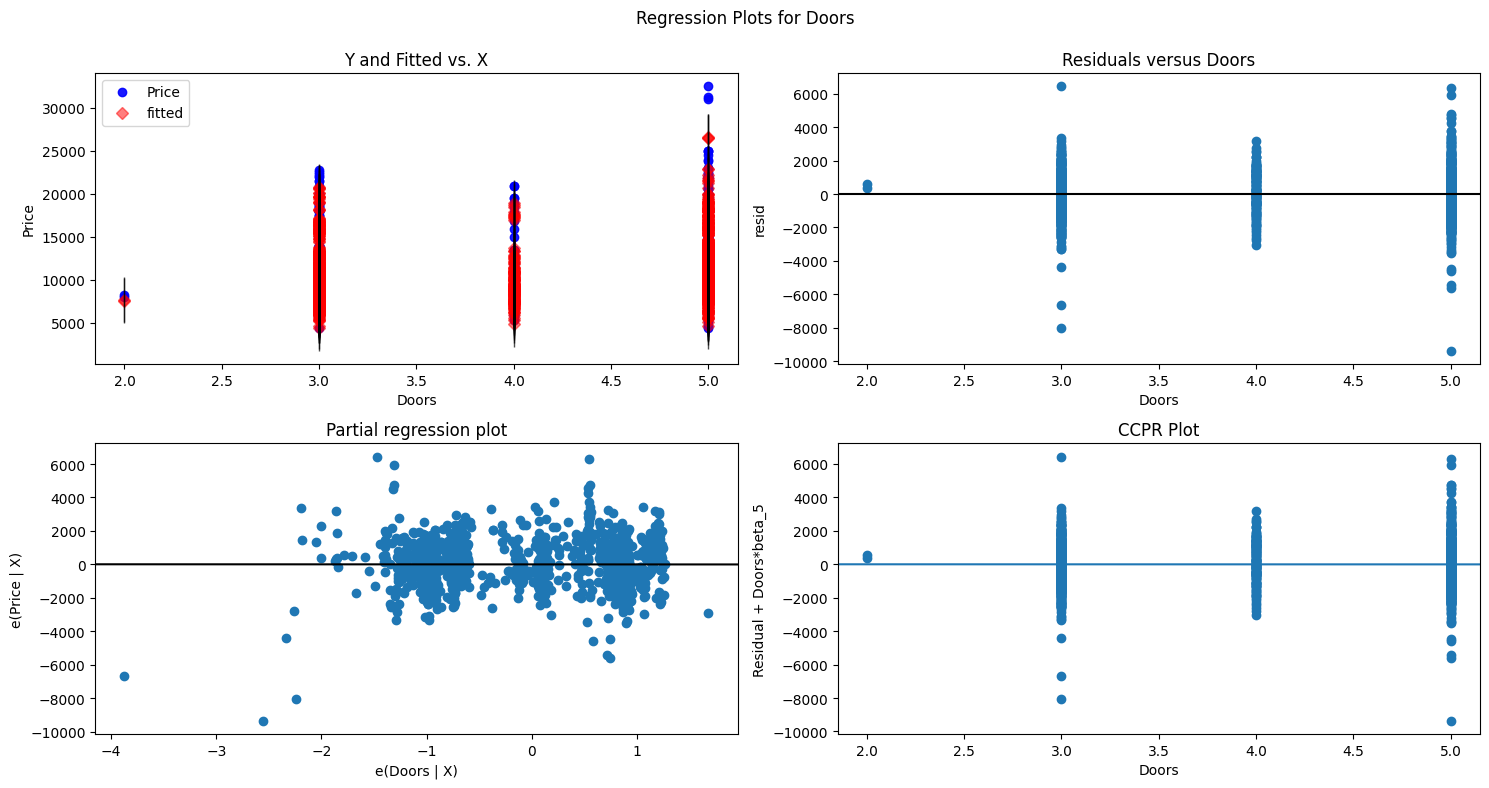

In [338]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

eval_env: 1


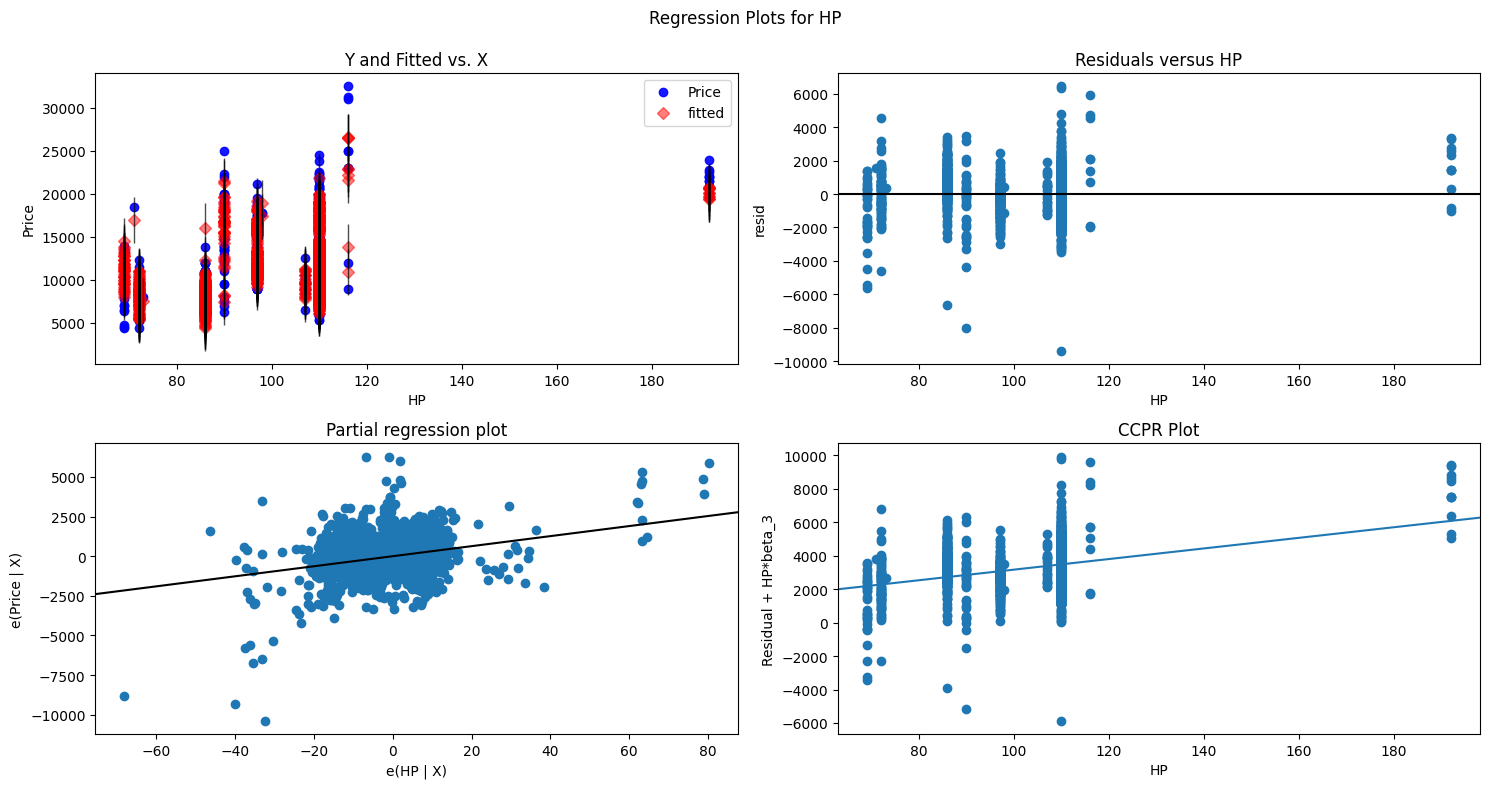

In [339]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


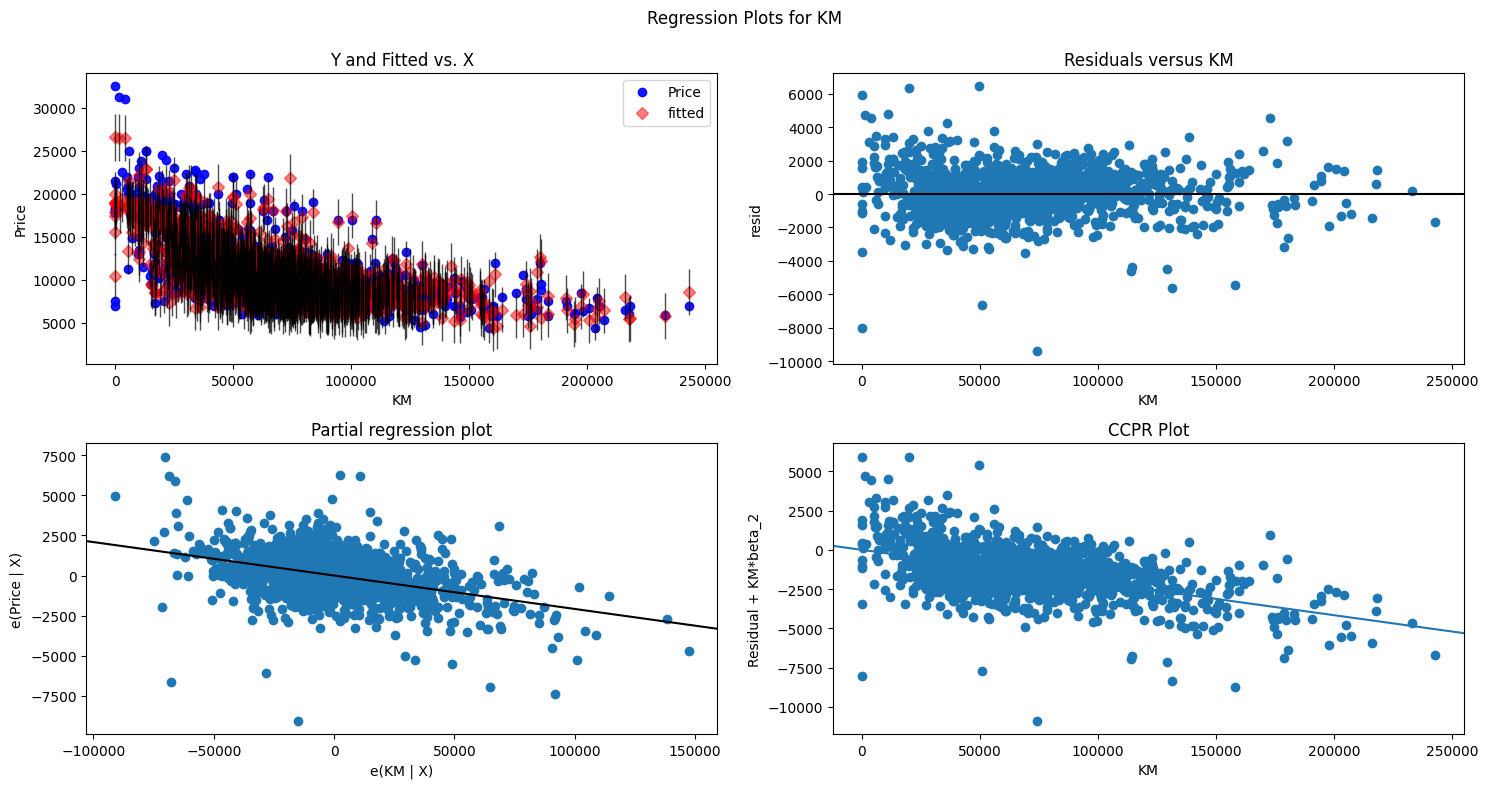

In [340]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

eval_env: 1


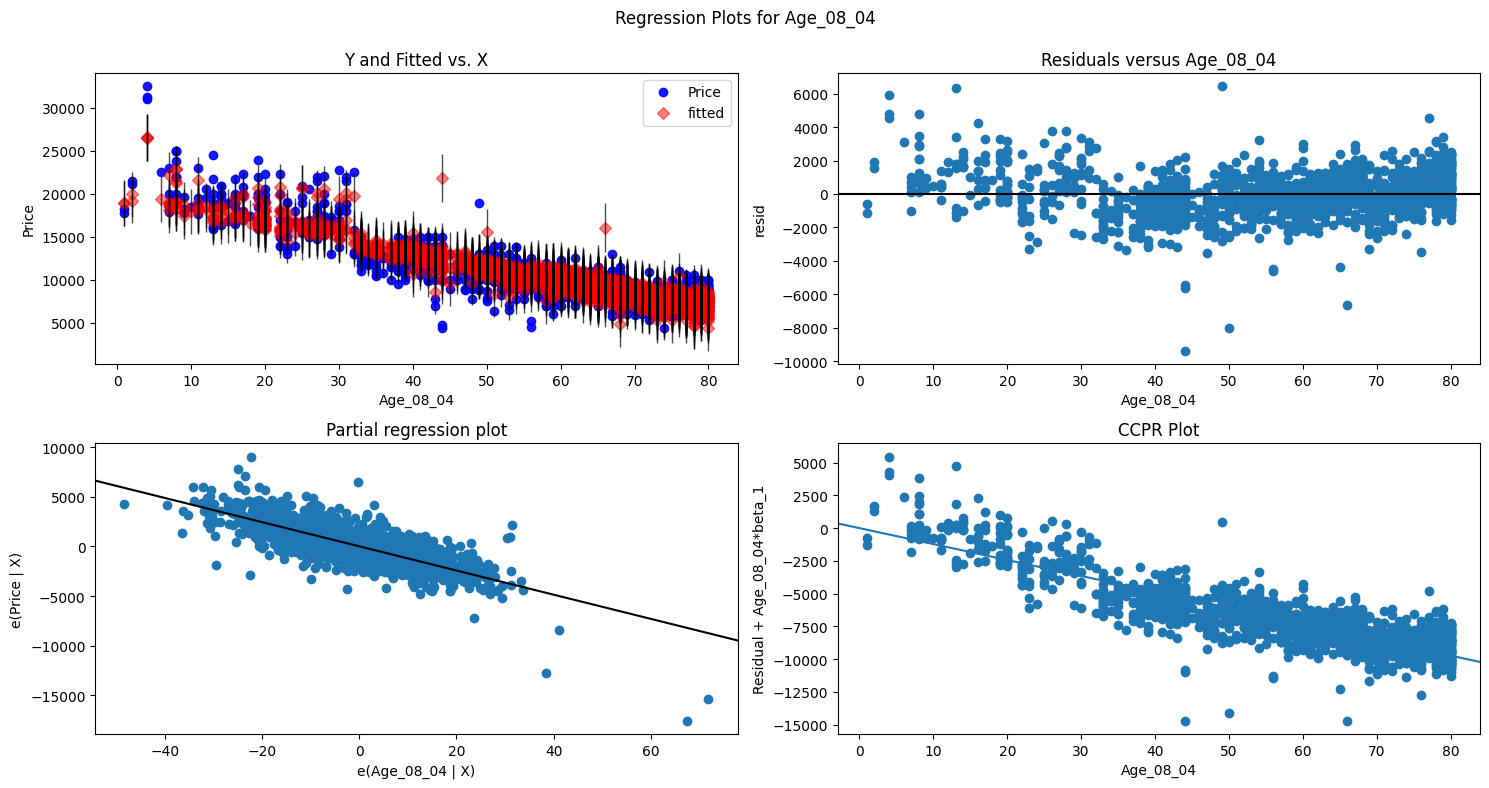

In [341]:
fig = plt.figure(figsize=(15,8))
fig= sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig)
plt.show()

In [344]:

# model deletion diagnostics
#detecting influencers/outliers

In [345]:
#COOK'S DISTANCE

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

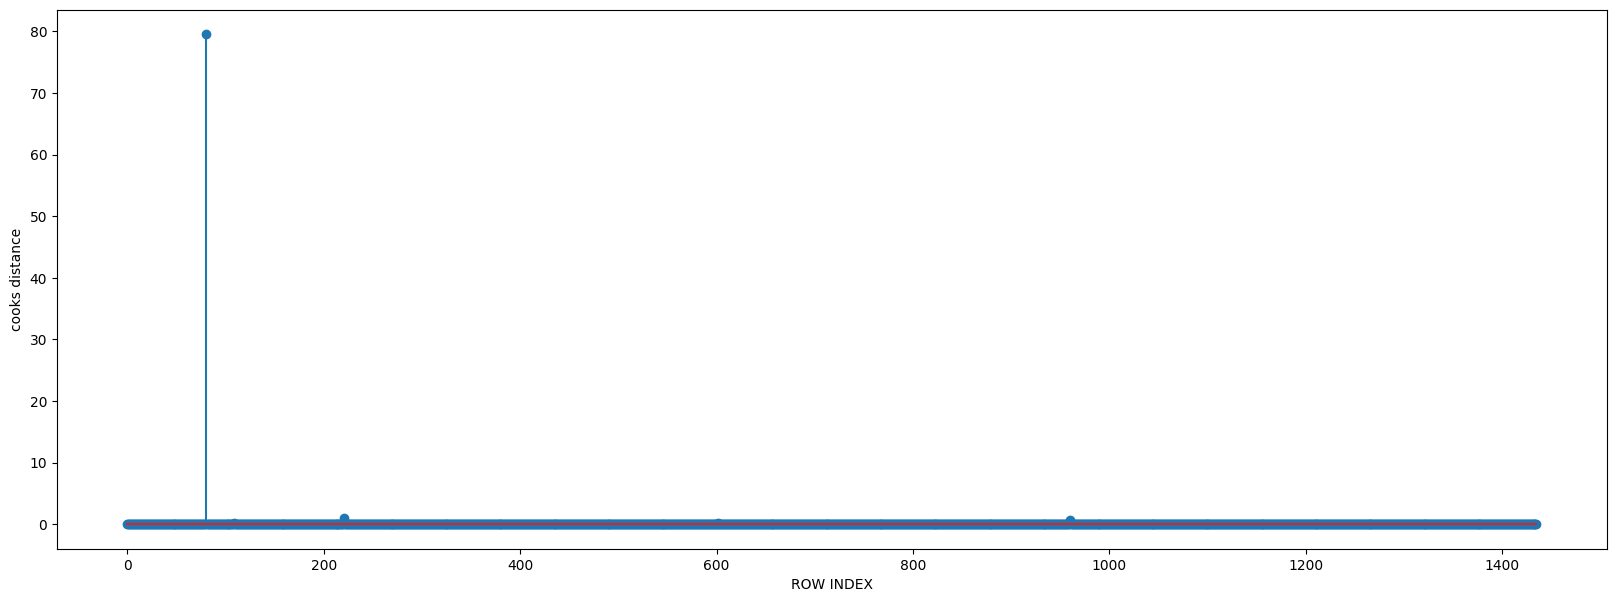

In [347]:
# plot the influencers values using stem plot
fig= plt.subplots(figsize =(20,7))
plt.stem(np.arange(len(corolla)),np.round(c,3))
plt.xlabel("ROW INDEX")
plt.ylabel("cooks distance")
plt.show()


In [348]:
#index and  values of influencer where c is more than .5
(np.argmax(c),np.max(c))    # index, distance of c 

(80, 79.52010624139507)

In [350]:
#high influence points/leverage

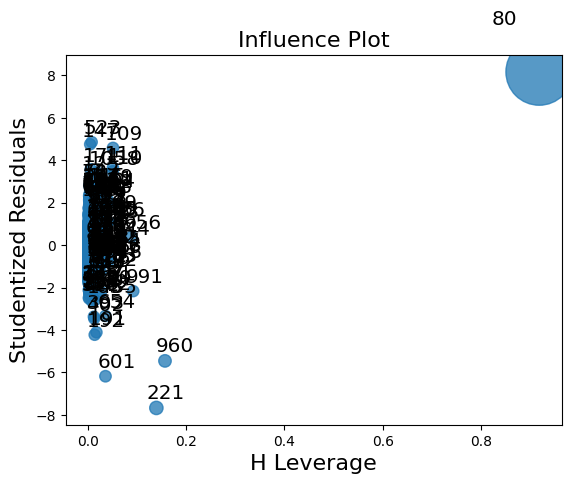

In [351]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [353]:
k= corolla.shape[1]
n= corolla.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020891364902506964

from the above plot, it is evident that datapoint 80 is the influencer

In [354]:
corolla[corolla.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [355]:
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


improving the model

In [360]:
## load the data
corolla_new = corolla.copy()
corolla_new.shape

(1436, 9)

In [361]:
#discard the data points which are influencers and reassign the row number (reset_index())
corolla_new=corolla_new.drop(corolla_new.index[[80]],axis=0).reset_index(drop= True)
corolla_new.shape

(1435, 9)

# build FINAL model

In [378]:
final_model= smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Doors+Quarterly_Tax+Weight",data=corolla_new).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:02:06   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [379]:
model.rsquared

0.8637627463428191

In [380]:
final_model.rsquared

0.8693790488655819

# MOdel prediction

In [381]:
#new data
new_data = pd.DataFrame({"Age_08_04":[26,22],"KM":[45987,41765],"HP":[90,90],"cc":[2000,2000],"Doors":[3,3],"Gears":[5,5],"Quarterly_Tax":[210,210],"Weight":[1165,1170]})

In [382]:
final_model.predict(new_data)

0    16185.456127
1    16843.460042
dtype: float64

In [383]:
pred = final_model.predict(corolla_new)

In [384]:
corolla_new["y_hat"]=pred

In [385]:
corolla_new.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,y_hat
0,13500,23,46986,90,2000,3,5,210,1165,16528.990607
1,13750,23,72937,90,2000,3,5,210,1165,16065.803813
2,13950,24,41711,90,2000,3,5,210,1165,16502.686471
3,14950,26,48000,90,2000,3,5,210,1165,16149.527067
4,13750,30,38500,90,2000,3,5,210,1170,15938.095051
